In [51]:
import warnings
warnings.filterwarnings('ignore')

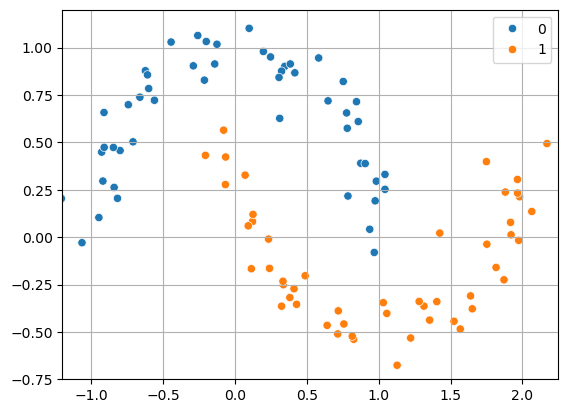

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.1, random_state=4)

plt.grid()
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

plt.xlim((-1.2, 2.25))
plt.ylim((-0.75, 1.2));

In [90]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures

scaler = StandardScaler()
polynomier = PolynomialFeatures(degree=3)
SVM = LinearSVC(C=100, loss='hinge',random_state=42)

poly_SVM = Pipeline([
    ('poly', polynomier),
    ('scaler', scaler),
    ('SVM', SVM)
])

In [91]:
poly_SVM.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('SVM', LinearSVC(C=100, loss='hinge', random_state=42))])

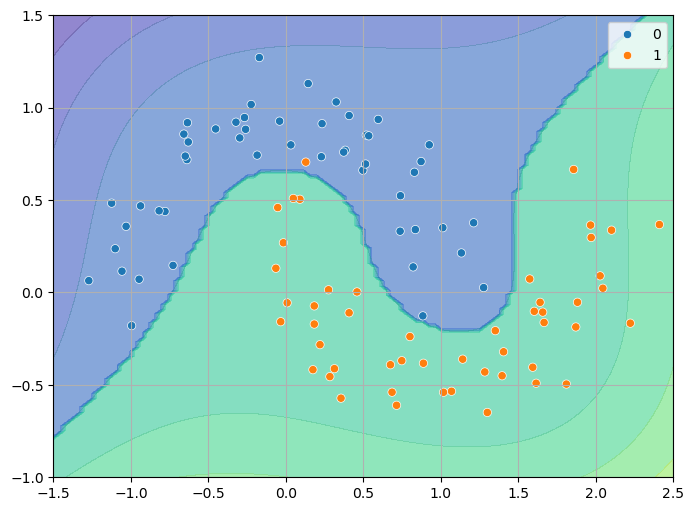

In [142]:
# Размечеваем все пространство
x_ = np.linspace(-1.5, 2.5, 100) # 100 точек по x
y_ = np.linspace(-1, 1.5, 100) # 100 точек по y

# Растяжение до 2Д
X_, Y_ = np.meshgrid(x_, y_)

# Склейка (собирает их в пары координат (X, Y))
X_new = np.c_[X_.ravel(), Y_.ravel()] # ravel- вытягивание в вектор
y_pred = poly_SVM.predict(X_new)

y_pred = y_pred.reshape(100, 100)
y_decision = poly_SVM.decision_function(X_new).reshape(-100, 100)


plt.figure(figsize=(8, 6))
plt.grid()
plt.contourf(X_, Y_, y_pred, alpha=0.3, cmap='winter')
plt.contourf(X_, Y_, y_decision, alpha=0.3)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y);

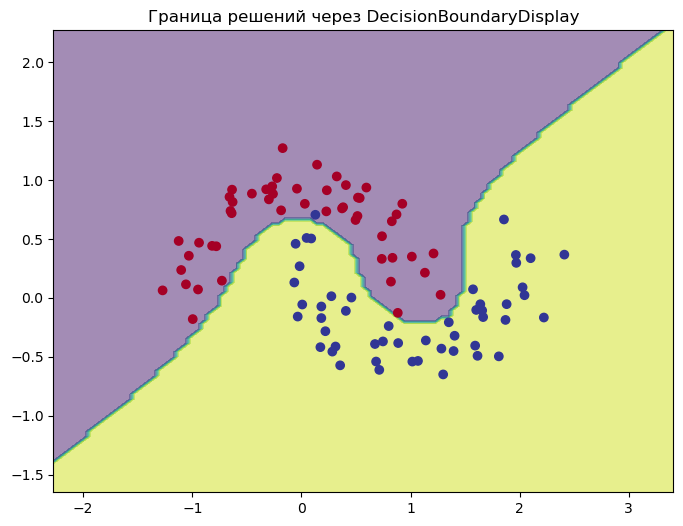

In [177]:
from sklearn.inspection import DecisionBoundaryDisplay

fig, ax=plt.subplots(figsize=(8, 6))
dbd = DecisionBoundaryDisplay.from_estimator(poly_SVM, X, alpha=0.5, response_method='predict', ax=ax)

dbd.ax_.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.title("Граница решений через DecisionBoundaryDisplay");

## Полиномиальное ядро | Ядерный трюк(kernel trick)

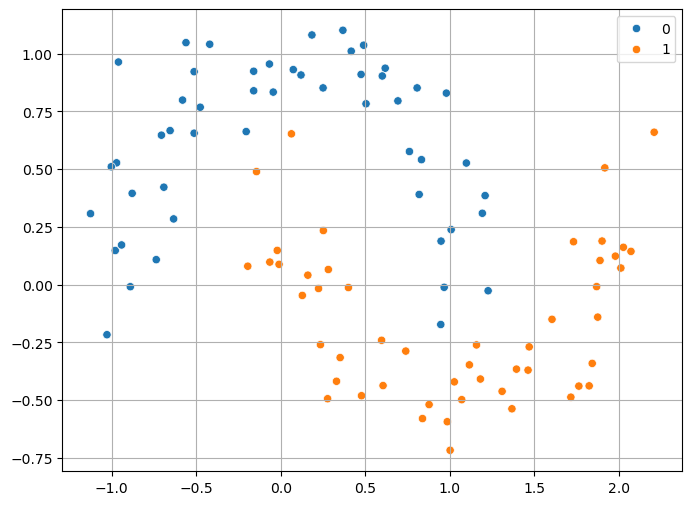

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15, random_state=23)

plt.figure(figsize=(8, 6))
plt.grid()
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y);

In [117]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

scaler = StandardScaler()
svm = SVC(kernel='poly', degree=10, C=5, coef0=1)

poly_kernel_svc_clf = Pipeline([
    ('scaler', scaler),
    ('SVM', svm)
])
poly_kernel_svc_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('SVM', SVC(C=5, coef0=1, degree=10, kernel='poly'))])

**degree** - Степень ядра\
**coef0** - Гиперпараметр отвечающий, насколько сильно полиномы высокой степени влияютс на модель в сравнении с полиномами более низкой

*Поиск параметров -> решетчатый поиск(GridSearchCV)*

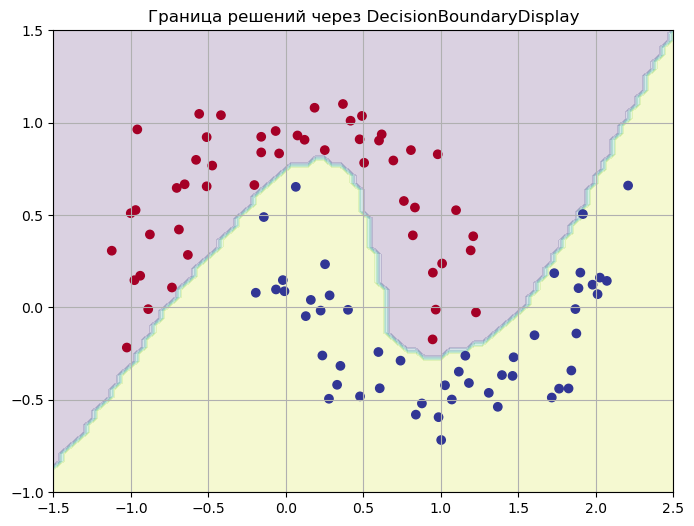

In [118]:
from sklearn.inspection import DecisionBoundaryDisplay as DBD

fig, ax=plt.subplots(figsize=(8, 6))
plt.grid()
plt.xlim((-1.5, 2.5))
plt.ylim((-1, 1.5))
dbd = DBD.from_estimator(poly_kernel_svc_clf, X, alpha=0.2, response_method='predict', ax=ax)
dbd.ax_.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.title("Граница решений через DecisionBoundaryDisplay");

# Линейная

**Данные**

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
iris = load_iris()
X = iris['data'][:, (2, 3)]
y = iris['target']

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [24]:
X.shape, y.shape

((100, 2), (100,))

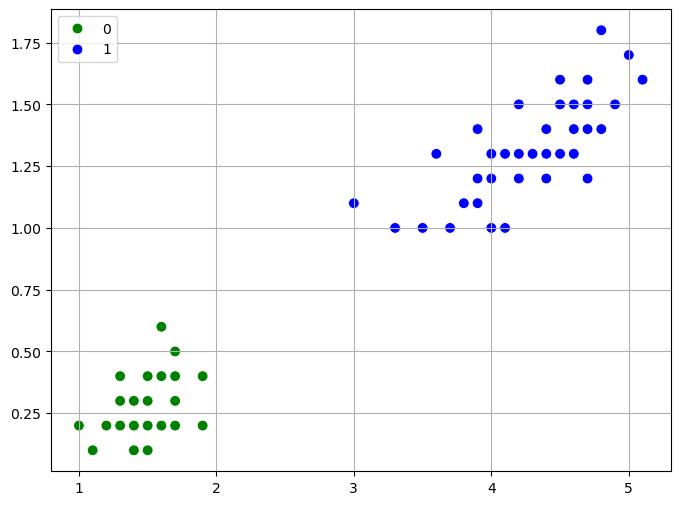

In [25]:
plt.figure(figsize=(8, 6))
plt.grid()
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, s=60, palette=['green', 'blue']);

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

SVM = Pipeline([
               ('scaler', StandardScaler()),
               ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))
               ])

SVM.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [55]:
from sklearn.svm import SVC
SVM2 = Pipeline([
               ('scaler', StandardScaler()),
               ('linear_svc', SVC())
               ])

SVM2.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('linear_svc', SVC())])

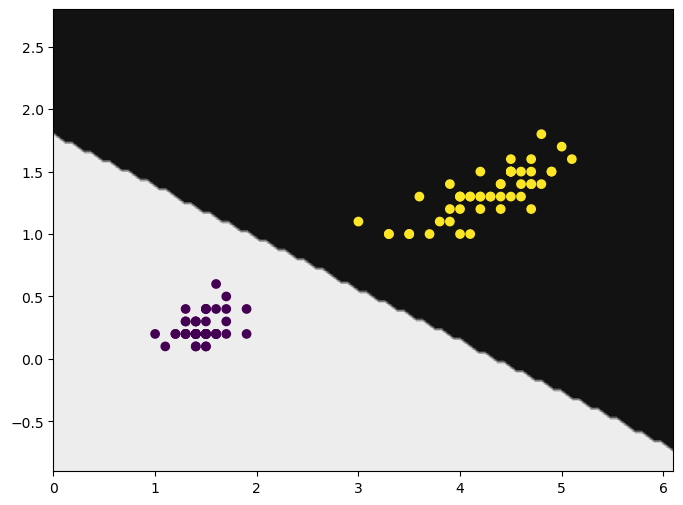

In [45]:
from sklearn.inspection import DecisionBoundaryDisplay as DBD

fig, ax = plt.subplots(figsize=(8, 6))
dbd = DBD.from_estimator(SVM, X, ax=ax, alpha=1, response_method='predict', cmap='binary')
dbd.ax_.scatter(X[:, 0], X[:, 1], c=y);